# Standardize any slime fit to the bp slime

This method uses the wasserstein distance to scale the sdss distribution to that of the Bolshoi-Planck slime fit density distribution. There are mismatches in the density of the two distributions, likely due to the fact that 
the sdss fits are missing lower mass galaxies compared to the fits on the simulation. Thus we need to visually inspect the standardization of the distribution. The slime mold folder NEED to be made with float32!!!

Ref:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html

In [47]:
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np
from pyslime import utils as pu
import pyslime.pipeline.pipelineUtils as ppu
import glob
from astropy.cosmology import Planck15 as cosmo
import pandas as pd


#import jax.numpy as jnp
# from jax import pmap, jit, vmap

# All the distribution data live here (except the simulation binaries):
packagedatadir = "/Users/mwilde/python/pyslime/pyslime/pipeline/data/"

# slime fit to the BP simulations


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
distfiles = glob.glob(packagedatadir+'*dist.npz')
distfiles.sort()

In [32]:
lowz = ['/Users/mwilde/python/pyslime/pyslime/pipeline/data/BP_z_0_0_dist.npz',
        '/Users/mwilde/python/pyslime/pyslime/pipeline/data/SDSS_z_44-476mpc_dist.npz', 
        '/Users/mwilde/python/pyslime/pyslime/pipeline/data/LRG_NGC_z_0-1000mpc_dist.npz',
        '/Users/mwilde/python/pyslime/pyslime/pipeline/data/LRG_NGC_z_900-1600mpc_dist.npz',
        '/Users/mwilde/python/pyslime/pyslime/pipeline/data/LRG_SGC_z_0-1000mpc_dist.npz',
        '/Users/mwilde/python/pyslime/pyslime/pipeline/data/LRG_SGC_z_900-1600mpc_dist.npz']

hiz = [f for f in distfiles if f not in lowz]

In [33]:
hiz

['/Users/mwilde/python/pyslime/pyslime/pipeline/data/BP_z_0_5_dist.npz',
 '/Users/mwilde/python/pyslime/pyslime/pipeline/data/LRG_NGC_z_1500-2100mpc_dist.npz',
 '/Users/mwilde/python/pyslime/pyslime/pipeline/data/LRG_NGC_z_2000-3000mpc_dist.npz',
 '/Users/mwilde/python/pyslime/pyslime/pipeline/data/LRG_SGC_z_1500-2100mpc_dist.npz',
 '/Users/mwilde/python/pyslime/pyslime/pipeline/data/LRG_SGC_z_2000-3000mpc_dist.npz']

In [22]:
len(packagedatadir)

51

In [36]:
def plot_multi_dist(distlist):
    for file in distlist:
        data = np.load(file)
        weigths = data['arr_0']
        values = data['arr_1']
        name = file[51:]
        plt.step(values, weigths, label=name)
    plt.legend(bbox_to_anchor=(1.1, 1.05))

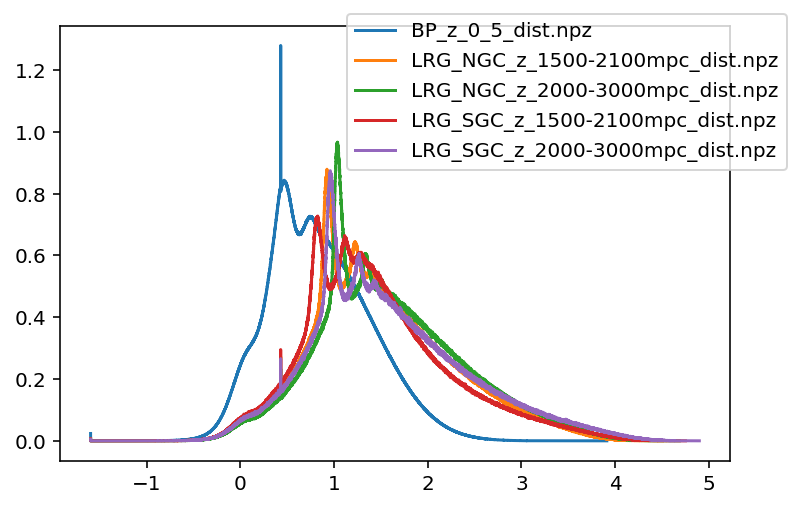

In [38]:
plot_multi_dist(hiz)

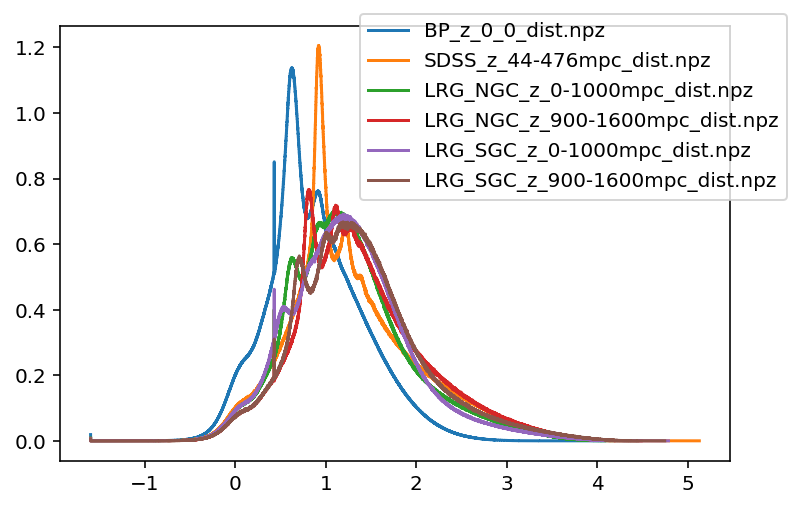

In [39]:
plot_multi_dist(lowz)

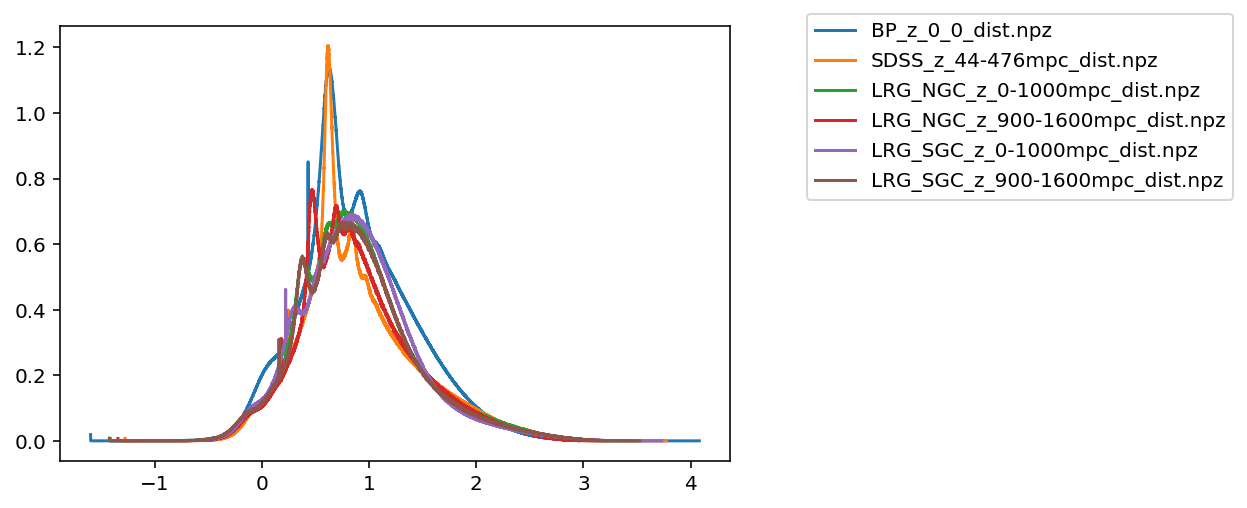

In [50]:
dflowz = ppu.calc_stretch_shift_df(lowz)


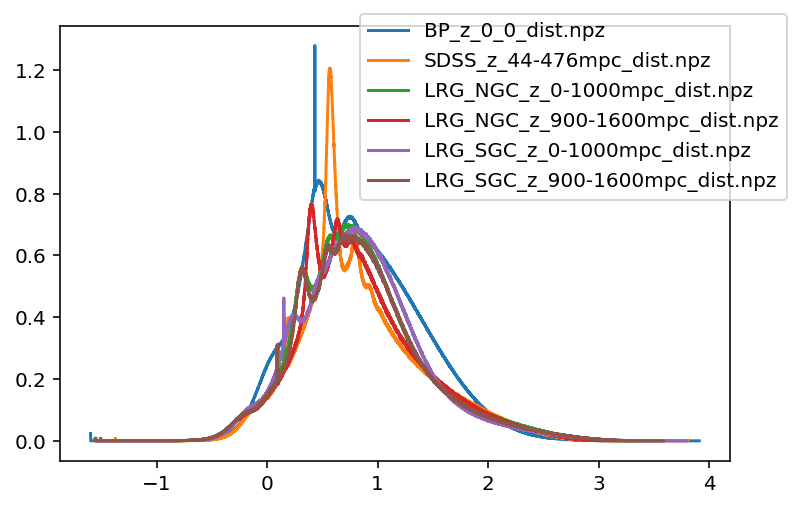

In [51]:
dfhiz = ppu.calc_stretch_shift_df(hiz)

In [54]:
# dflowz.to_csv(packagedatadir+"transform_table_lowz.csv")

In [55]:
# dfhiz.to_csv(packagedatadir+"transform_table_hiz.csv")

In [58]:
dfall = pd.concat([dflowz, dfhiz])

In [59]:
dfall.to_csv(packagedatadir+"transform_tabl_all.csv")